In [23]:
import pandas as pd
import matplotlib.pyplot as mp

In [24]:
file = 'MII-dec-2022.xlsx'
xl = pd.ExcelFile(file)
# print(xl.sheet_names)
df = xl.parse(xl.sheet_names[0])
df.drop(df.tail(1).index,inplace=True) # drop last n rows
# print(df1)

In [25]:
# df1[['GC1','GC2']] = df1['Group code'].str.split(expand=True).add_prefix('visit_')
temp = df.astype({'Group code':'string'})['Group code'].str.split(pat ="\\s*",expand=True).add_prefix('GC')
df['GC1'] = pd.Series(temp['GC1'])
df['GC2'] = pd.Series(temp['GC2'])
# df1.describe

In [26]:
df['GC1'].unique()

<StringArray>
['3', '1', '4', '6', '2', '9', '7', '5', '8', '0', <NA>]
Length: 11, dtype: string

In [27]:
df['GC2'].unique()

<StringArray>
['3', '8', '4', '5', '0', '1', '.', '6', '2', '7', <NA>, '9']
Length: 12, dtype: string

In [28]:
df['Group code text'].unique()
#df1['Group code text'].unique().size

array(['Planned SME OH', 'BWE Electrical', 'Conveyor Vulcanising',
       'Conveyor CMM', 'Planned Operation', 'BWE Operation',
       'Planned VULCANSING', 'Conveyor Operation', 'Spreader Operation',
       'MTC MM', 'Conveyor Electrical', 'BWE MM', 'Unplanned Vulcanising',
       'Common Miscellaneous', 'Common Other', 'Conveyor CMRR',
       'Unplanned MM', 'Tripper Operation', 'Unplanned MRR',
       'Common Electrical', 'Planned Track shifting',
       'Unplanned OPERATION', 'MTC Operation', 'Common Operation',
       'MTC Electrical', 'Tripper CMM', 'Tripper Vulcanising',
       'BWE VULCANSING', 'BWE MRR', nan, 'Unplanned ELECTRICAL',
       'Spreader MM', 'Spreader Vulcanising', 'Unplanned SME', 'MTC MRR',
       'Spreader Electrical', 'Stacker Operation', 'Stacker MM',
       'Reclaimer Operation', 'Reclaimer MM', 'Reclaimer Vulcanising'],
      dtype=object)

In [29]:
# df1['Group code text'] = df1['Group code text'].fillna("")
df = df.dropna(axis=0, subset=['Duration'])
df = df.dropna(axis=0, subset=['Group code text'])

#df['GCText1'] = df.apply(lambda row: row['Group code text'].split(" ", 1)[0].strip().upper(), axis=1)
#df['GCText2'] = df.apply(lambda row: row['Group code text'].split(" ", 1)[len(row['Group code text'].split(" ", 1))-1].strip().upper(), axis=1)
# df1 = df1[df1['GCText1'] != 'PLANNED']

def calculateMin(x):
    arr = x.split('.')
    if arr[0] != '' and arr[1] != '':
        return int(arr[0])*60 + int(arr[1])
    else:
        return 0
df['DurInMin'] = df.apply(lambda row: calculateMin(row['Duration']), axis=1)
df

,Plant,Date,Shift,Material Number,Bench,BWE,TWH,EWH,Stoppage,BOUND HOURS,...,Time to,Duration,Group code,Cause code,Remarks,Group code text,Cause code text,GC1,GC2,DurInMin
0,M002,2022-12-01,I,SF01OBURDEN,NSB,1420,00.00,00.00,08.00,0.0,...,1400.0,08.00,33.0,1.0,Over haul,Planned SME OH,Over haul,3,3,480
1,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,800.0,02.00,18.0,17.0,BW boom hoisting & lowering & L/U Track moveme...,BWE Electrical,Hoisting/lowering trouble-ele.,1,8,120
2,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,855.0,00.15,44.0,5.0,NS7 Center core cutting,Conveyor Vulcanising,Center core cutting,4,4,15
3,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,930.0,00.15,45.0,1.0,NS7 Frame no : 38 Roller removal,Conveyor CMM,Line roller changing/removal,4,5,15
4,M002,2022-12-01,I,SF01OBURDEN,NSB,1422,01.00,01.00,07.00,0.0,...,1330.0,04.00,30.0,2.0,Daily maintenance,Planned Operation,Daily maintenance,3,0,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,M002,2022-12-31,II,FG01LIGNITE,LHS,REC2,03.00,03.00,05.00,0.0,...,2200.0,03.30,7.0,99.0,stand by,Common Miscellaneous,Others,7,.,210
4178,M002,2022-12-31,III,FG01LIGNITE,LHS,1231,00.00,00.00,08.00,0.0,...,600.0,08.00,7.0,99.0,Stand by,Common Miscellaneous,Others,7,.,480
4179,M002,2022-12-31,III,FG01LIGNITE,LHS,REC1,00.00,00.00,08.00,0.0,...,600.0,08.00,7.0,99.0,stand by,Common Miscellaneous,Others,7,.,480
4180,M002,2022-12-31,III,FG01LIGNITE,LHS,REC2,03.00,03.00,05.00,0.0,...,2315.0,01.15,7.0,99.0,stand by,Common Miscellaneous,Others,7,.,75


In [30]:
df.groupby(['GC1', 'Group code text']).size().nlargest(10)

GC1  Group code text       
4    Conveyor Vulcanising      1039
7    Common Miscellaneous       622
1    BWE Operation              611
3    Planned Operation          344
4    Conveyor CMM               307
     Conveyor Operation         231
9    Common Other               155
     Unplanned Vulcanising      109
3    Planned Track shifting     103
     Planned SME OH              94
dtype: int64

In [31]:
df.groupby(['GC2', 'Group code text']).size().nlargest(10)

GC2  Group code text       
4    Conveyor Vulcanising      1039
.    Common Miscellaneous       622
0    BWE Operation              611
     Planned Operation          344
5    Conveyor CMM               307
0    Conveyor Operation         231
.    Common Other               155
4    Unplanned Vulcanising      109
7    Planned Track shifting     103
3    Planned SME OH              94
dtype: int64

In [32]:
df.groupby(['Cause code', 'Cause code text']).size().nlargest(10)

Cause code  Cause code text              
99.0        Others                           577
9.0         BTR Clamp fixing                 550
2.0         Daily maintenance                344
12.0        BWE Repostioning/movement        318
1.0         BWE Track Area Preparation       238
            Line  roller changing/removal    231
21.0        Machine on Stand-By              189
5.0         Center core cutting              160
1.0         OB Rear load                     152
5.0         TE cleaning                      118
dtype: int64

In [33]:
df2= df.groupby(['GC1', 'Group code text','DurInMin']).size().nlargest(10).reset_index(name ='FreqCount')
df2

,GC1,Group code text,DurInMin,FreqCount
0,1,BWE Operation,30,303
1,3,Planned Operation,120,266
2,4,Conveyor Vulcanising,15,177
3,4,Conveyor Vulcanising,30,177
4,4,Conveyor Vulcanising,60,142
5,7,Common Miscellaneous,480,137
6,4,Conveyor CMM,30,109
7,3,Planned SME OH,480,94
8,4,Conveyor CMM,15,91
9,4,Conveyor Vulcanising,90,91


In [34]:
tmp1= df.groupby(['GC1', 'Group code text'])['DurInMin'].sum().nlargest(10).reset_index(name ='DurSum')
tmp2= df.groupby(['GC1', 'Group code text']).size().nlargest(10).reset_index(name ='FreqCount')
df2 = tmp1.merge(tmp2,on=['GC1', 'Group code text'],how="inner")
df2

,GC1,Group code text,DurSum,FreqCount
0,7,Common Miscellaneous,103505,622
1,4,Conveyor Vulcanising,75225,1039
2,9,Unplanned Vulcanising,46770,109
3,3,Planned Track shifting,45930,103
4,3,Planned SME OH,45120,94
5,3,Planned Operation,43500,344
6,9,Common Other,34150,155
7,1,BWE Operation,23030,611
8,4,Conveyor Operation,12490,231


In [35]:
df2 = df.groupby(['Group code text','Cause code'])['DurInMin'].sum().nlargest(10).reset_index(name ='DurSum')

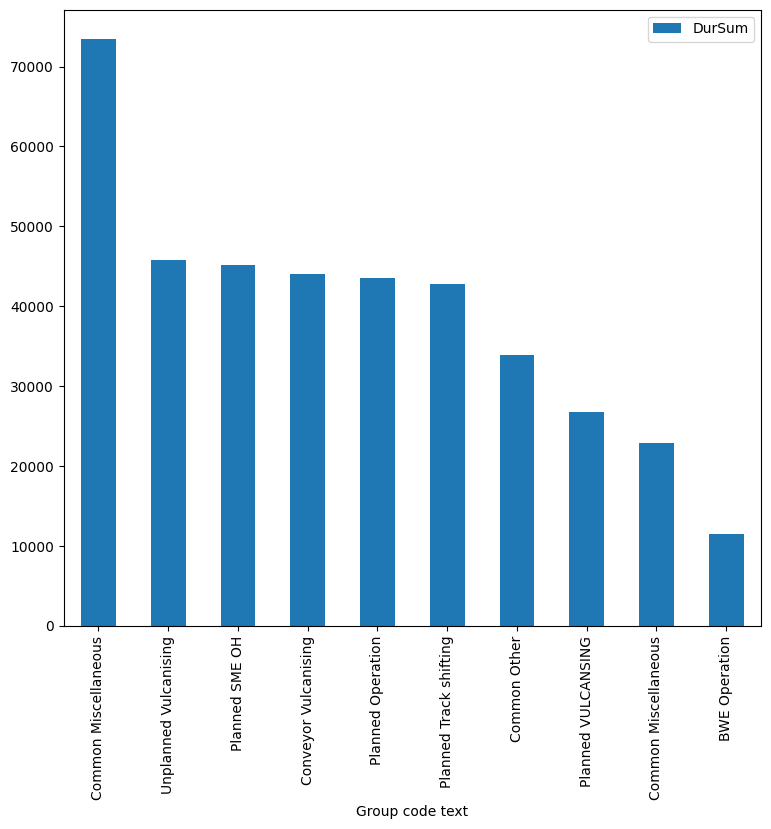

In [36]:
# plot the dataframe
df2.plot(x='Group code text', y=['DurSum'], kind="bar", figsize=(9, 8))
mp.show()

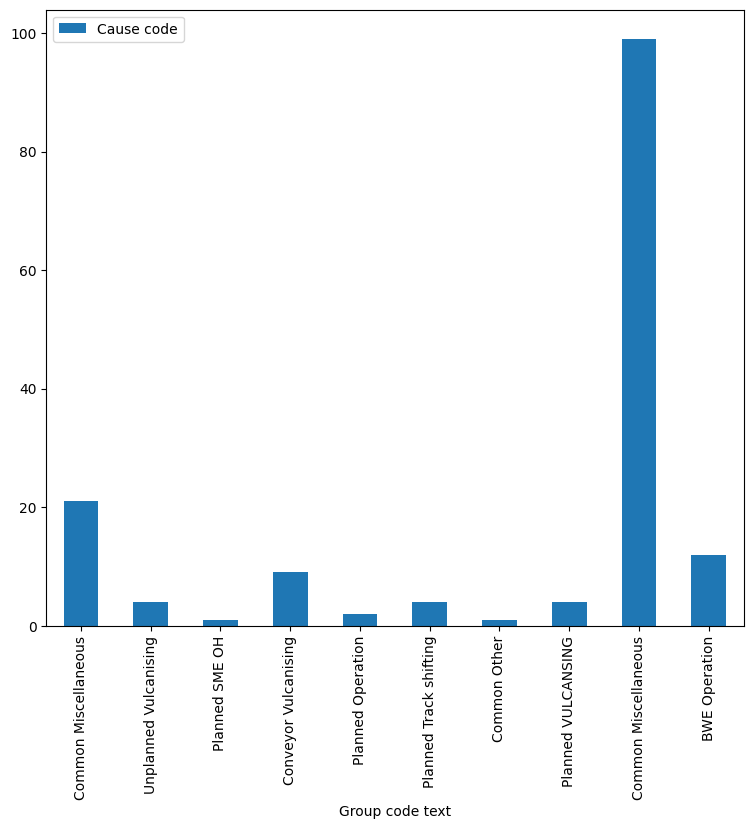

In [37]:
# plot the dataframe
df2.plot(x='Group code text', y=['Cause code'], kind="bar", figsize=(9, 8))
mp.show()

In [38]:
df3 = df.groupby(['Cause code text'])['DurInMin'].sum().nlargest(10).reset_index(name ='DurInMin')
df3

,Cause code text,DurInMin
0,Machine on Stand-By,73445
1,Others,49715
2,Conveyor unplanned vulcanising,45810
3,Over haul,45120
4,BTR Clamp fixing,44165
5,Daily maintenance,43500
6,Shifting,42840
7,OB Rear load,33845
8,Conveyor planned vulcanising works,26760
9,BWE Repostioning/movement,11435


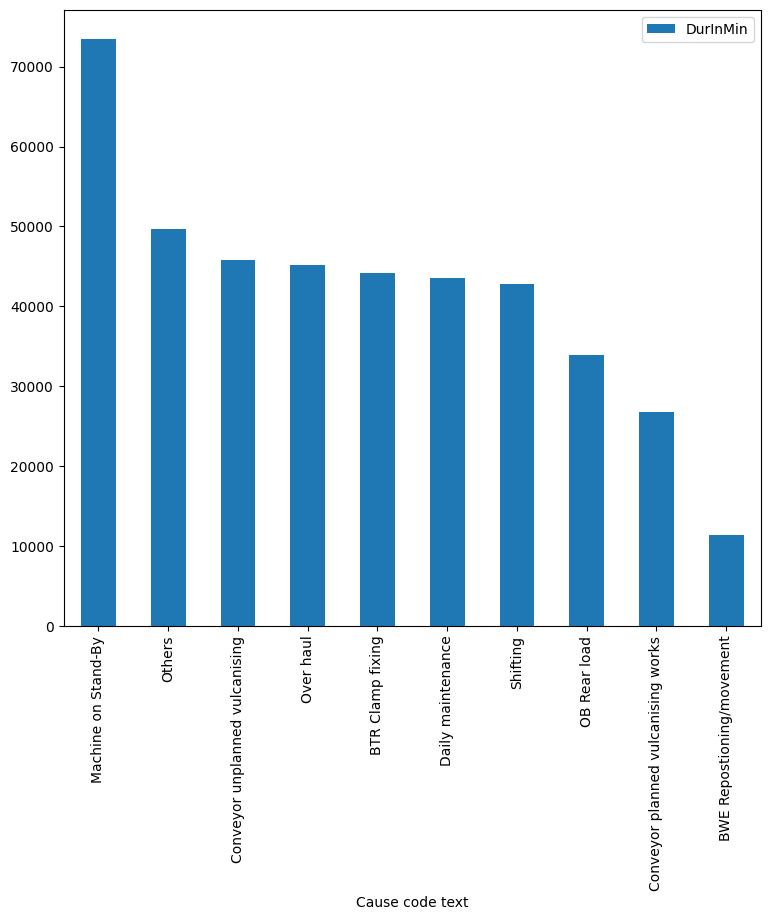

In [39]:
# plot the dataframe
df3.plot(x='Cause code text', y=['DurInMin'], kind="bar", figsize=(9, 8))
mp.show()

In [40]:
df4 = df.groupby(['Cause code'])['DurInMin'].sum().nlargest(10).reset_index(name ='DurSum')
df4

,Cause code,DurSum
0,1.0,131410
1,4.0,126215
2,21.0,73445
3,99.0,55945
4,2.0,50435
5,9.0,44950
6,12.0,15760
7,5.0,11365
8,16.0,5265
9,17.0,3240


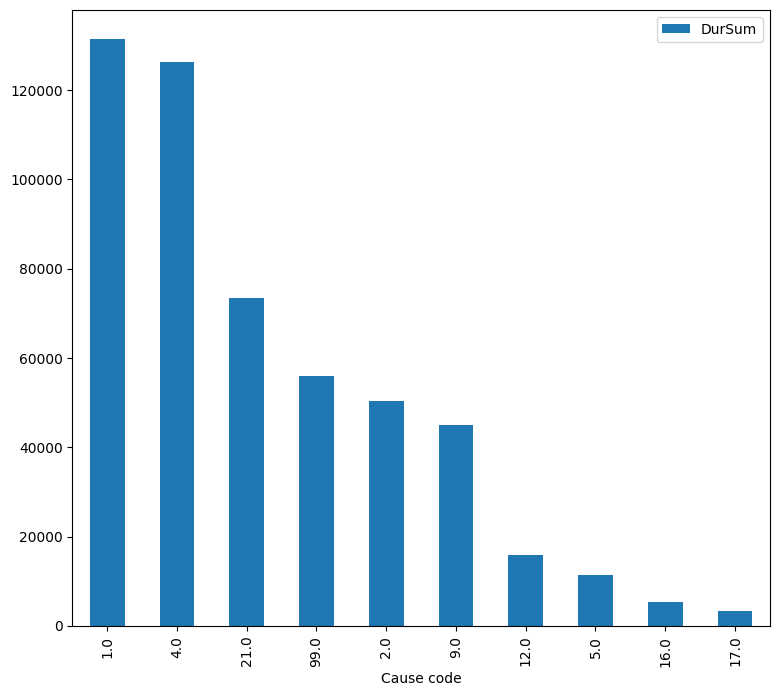

In [48]:
# plot the dataframe
df4.plot(x='Cause code', y=['DurSum'], kind="bar", figsize=(9, 8))
mp.show()

In [50]:
df5 = df.groupby(['Group code'])['DurInMin'].sum().nlargest(10).reset_index(name ='DurSum')
df5

,Group code,DurSum
0,7.0,103505
1,44.0,75225
2,94.0,46770
3,37.0,45930
4,33.0,45120
5,30.0,43500
6,34.0,37470
7,9.0,34150
8,10.0,23030
9,40.0,12490


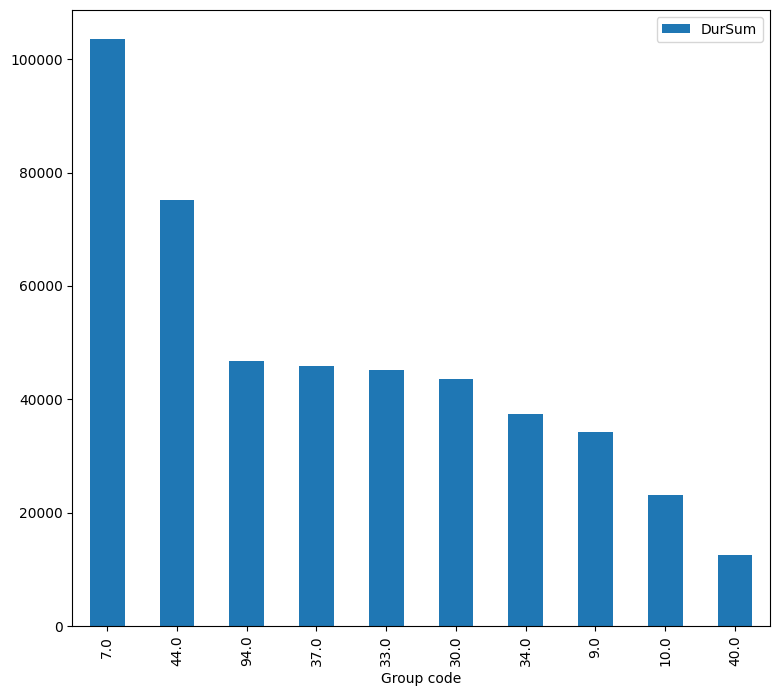

In [51]:
df5.plot(x='Group code', y=['DurSum'], kind="bar", figsize=(9, 8))
mp.show()

In [ ]:
df6 = df.groupby(['Shift'])['DurInMin'].sum().reset_index(name ='DurInMin')
df6

,Shift,DurInMin
0,I,202920
1,II,165075
2,III,166115


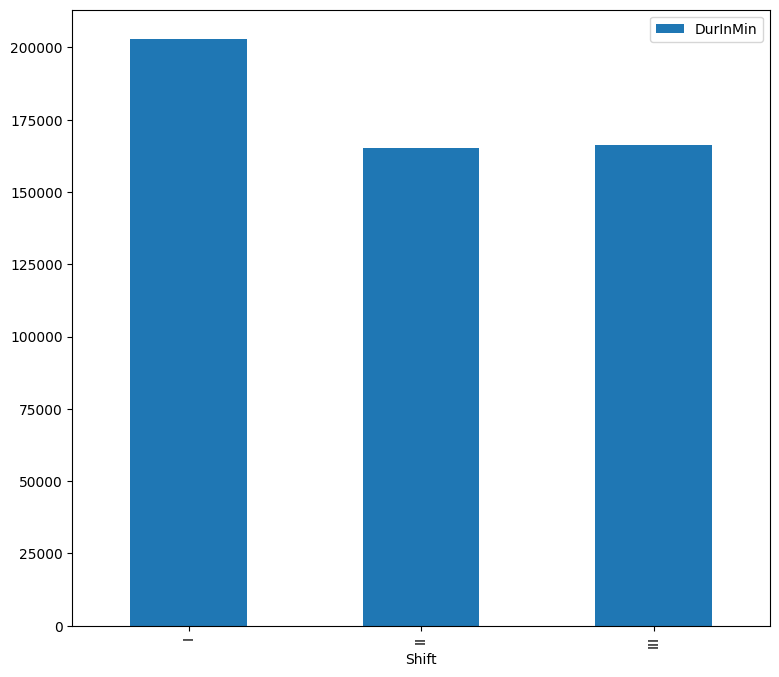

In [ ]:
# plot the dataframe
df6.plot(x='Shift', y=['DurInMin'], kind="bar", figsize=(9, 8))
mp.show()

In [76]:
df7=df.groupby(['Group code', 'Cause code']).size().nlargest(10).reset_index(name='FreqCount')

<Axes: xlabel='Group code', ylabel='Group code'>

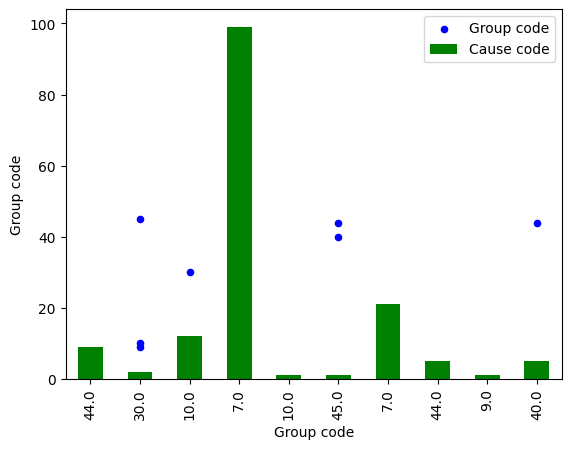

In [78]:
#df7=df.groupby(['Group code', 'Cause code']).size().nlargest(10).reset_index(name='FreqCount')
ax = df7.plot.scatter(x="Cause code", y="Group code", color="Blue", label="Group code")
df7.plot.bar(x="Group code", y="Cause code", color="Green", label="Cause code", ax=ax)